## Les CB

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [103]:
data = pd.read_csv('./Credit Card Customer Data.csv', sep=',')
Index = data.index.values
X = data.iloc[:, 2:].values
labels = data.iloc[:, 0].values

data
len(data.index)

660

## Normalisation

In [3]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)
Xnorm = SS.transform(X)

Xnorm[0,:] # Données normalisé pour le premier ID 



array([ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737])

## ACP

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Xnorm)

print(pca.explained_variance_)

print(pca.explained_variance_ratio_)

[2.29029906 1.87416377]
[0.45736578 0.37426483]


In [5]:
X_pca = pca.transform(Xnorm)
X_pca[0,:]

array([0.50129079, 0.52482909])

In [6]:
1/np.sqrt(5)

0.4472135954999579

In [7]:
pca.components_ # Poids des données

array([[ 0.48885901,  0.59767943,  0.28049227,  0.11178284, -0.55912866],
       [ 0.40323959,  0.03017103, -0.58658661,  0.66516108,  0.22352726]])

In [8]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red', label="Variable-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch])
        plt.show()

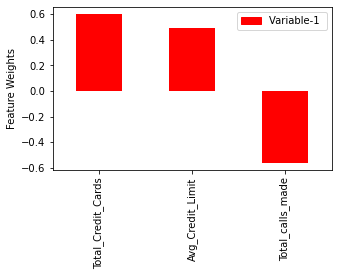

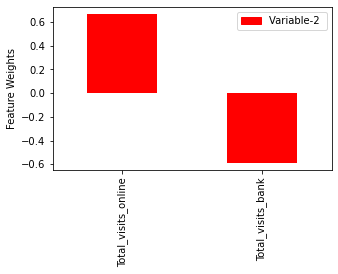

In [9]:
print_top_comp(pca.components_, data.columns[2:14], 12)

Text(0.5, 1.0, 'Circle of Correlations')

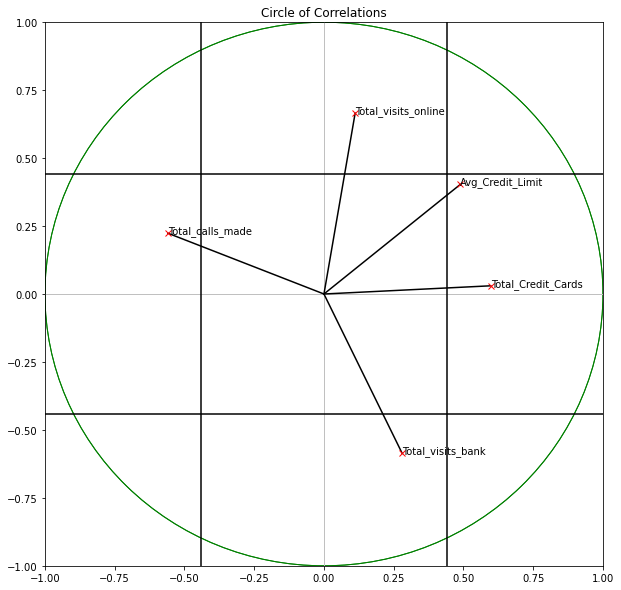

In [10]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos = pd.DataFrame(coef, columns=cols, index=data.iloc[:, 2:].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)

plt.axhline(0.44, color='black')
plt.axvline(0.44, color='black')
plt.axvline(-0.44, color='black')
plt.axhline(-0.44, color='black')

# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))

plt.title("Circle of Correlations")

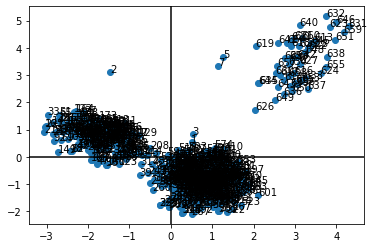

In [11]:
import matplotlib

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.show()

#plotib 

## Clustering

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(Xnorm)
clustering = kmeans.labels_
kmeans.cluster_centers_

array([[ 0.30609715,  0.54439335,  0.46316547, -0.1659433 , -0.58985407],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882]])

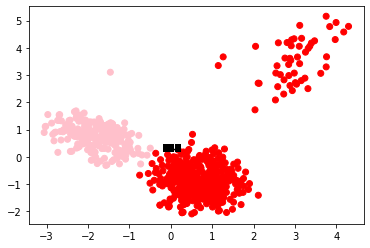

In [35]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
plt.show()

In [33]:
from sklearn import metrics
for i in np.arange(2, 10):
    clustering = KMeans(n_clusters=i).fit_predict(Xnorm)
    print(metrics.silhouette_score(Xnorm, clustering,metric='euclidean'))
    print()

0.41842496663230405

0.5157182558882754

0.35566706193773706

0.2717470361094591

0.25588029066457046

0.2486829396535408

0.2276393582477422

0.2147781602674392



In [36]:
from sklearn.cluster import AgglomerativeClustering

clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(Xnorm)
clustering_ward
clustering_ward = clustering_ward.labels_

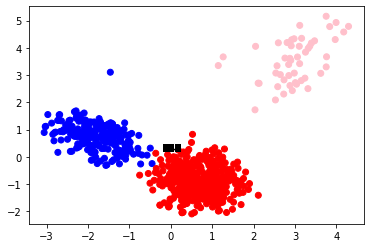

In [38]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
plt.show()

In [39]:
for i in np.arange(2, 10):
    clustering_ward = AgglomerativeClustering(n_clusters=i, linkage="ward").fit_predict(Xnorm)
    print(metrics.silhouette_score(Xnorm, clustering_ward,metric='euclidean'))
    print()

0.41770414762109936

0.5147639589979518

0.348082258126694

0.25691777326808435

0.2267784972566746

0.21629686854980873

0.21869490619485493

0.19527074669218447



In [50]:
clustering_average = AgglomerativeClustering(n_clusters=2, linkage='average').fit(Xnorm)
clustering_average
clustering_average = clustering_average.labels_


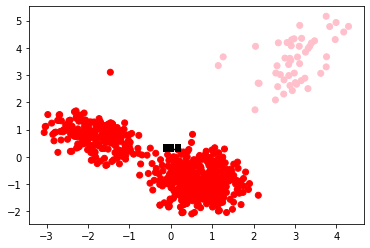

In [52]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
plt.show()

In [53]:
from sklearn import metrics
for i in np.arange(2, 10):
    clustering_average = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(Xnorm)
    print(metrics.silhouette_score(Xnorm, clustering_average,metric='euclidean'))
    print()

0.5703183487341072

0.5159224326511334

0.4749514359581223

0.4403975302480271

0.4153547954833329

0.41837756746739024

0.34306710358300163

0.34154869328928283



## K_means -> CAH -> K_means

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=66).fit(Xnorm)
clustering = kmeans.labels_
K_means_data = kmeans.cluster_centers_

In [92]:
clustering_average = AgglomerativeClustering(n_clusters=2, linkage='average').fit(K_means_data)
#clustering_average
clustering_average = clustering_average.labels_
clustering_average

from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clustercahmoy = clf.fit(K_means_data, clustering_average)
my_centroids = np.asarray(clf.centroids_)


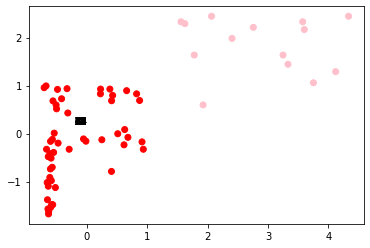

In [90]:
colors = ['red','yellow','blue','pink']
plt.scatter(K_means_data[:, 0], K_means_data[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, K_means_data[:, 0], K_means_data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
plt.show()

In [93]:
kmeans = KMeans(n_clusters=2, init=my_centroids).fit(Xnorm)
clustering = kmeans.labels_


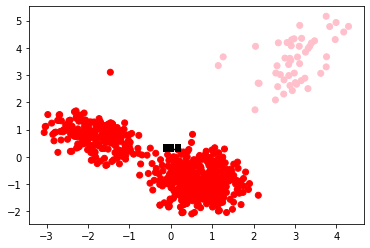

In [94]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
plt.show()

In [133]:
def getClusterBigData(dataSet):
    #Import
    from sklearn.cluster import KMeans
    
    #Get le nb de ligne 
    nbCluster = len(data.index) / 10
    nbCluster = int(nbCluster)
    
    #Algo kmeans
    kmeans = KMeans(n_clusters=nbCluster).fit(dataSet)
    clustering = kmeans.labels_
    K_means_data = kmeans.cluster_centers_
    
    #nbClusterVoulu
    aaa = np.zeros(10)-1
    from sklearn import metrics
    for i in np.arange(2, 10):
        clustering = KMeans(n_clusters=i).fit_predict(dataSet)
        aaa[i] = metrics.silhouette_score(dataSet, clustering,metric='euclidean')
    nbClusterVoulu = (np.argmax(aaa))
    
    #Algo CAH
    clustering_average = AgglomerativeClustering(n_clusters=nbClusterVoulu, linkage='average').fit(K_means_data)
    clustering_average = clustering_average.labels_
    clustering_average
    
    #Import pour les milieux
    from sklearn.neighbors import NearestCentroid

    #Get les milieux
    clf = NearestCentroid()
    clustercahmoy = clf.fit(K_means_data, clustering_average)
    my_centroids = np.asarray(clf.centroids_)
    
    #Kmeans sur les données finales avec les centres fixes
    kmeans = KMeans(n_clusters=nbClusterVoulu, init=my_centroids).fit(dataSet)
    clustering = kmeans.labels_
    
    colors = ['red','yellow','blue','pink']
    plt.scatter(dataSet[:, 0], dataSet[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, dataSet[:, 0], dataSet[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2))
    plt.show()


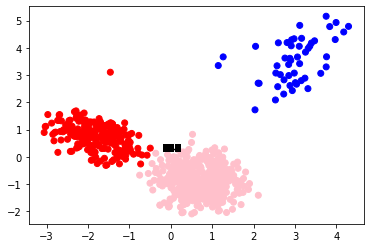

In [134]:
getClusterBigData(X_pca)